# TP 3: Clasificación: Mushrooms

### Desarrollaremos un trabajo de clasificación de variables categóricas en base al Dataset Mushrooms descargado desde Kagel, el cual clasifica  una muestra de hongos en base propiedades fisicas relevando si son venenosos o comestibles. 


### Al comenzar imporatamos las librerias y modulos que usaremos

In [1]:
import pandas as pd
import numpy as np

#### Importamos el dataset con el que vamos a trabajar, lo cargamos una variable DataFrame y realizamos un Análisis Exploratorio

In [2]:
df = pd.read_csv('mushrooms.csv')
df.sample(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5124,p,f,s,w,t,f,f,c,b,h,...,f,w,w,p,w,o,p,h,v,g
2439,e,f,y,e,t,n,f,c,b,u,...,s,g,w,p,w,o,p,k,v,d
3823,e,x,y,n,t,n,f,c,b,u,...,s,g,p,p,w,o,p,n,y,d
1585,p,x,s,w,t,p,f,c,n,w,...,s,w,w,p,w,o,p,n,v,u
2481,e,x,f,e,t,n,f,c,b,n,...,s,w,g,p,w,o,p,k,y,d
88,e,f,y,n,t,l,f,c,b,w,...,y,w,w,p,w,o,p,k,y,g
7288,p,k,y,n,f,y,f,c,n,b,...,s,p,w,p,w,o,e,w,v,p
6742,p,x,s,e,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,d
1536,e,x,s,g,f,n,f,w,b,p,...,f,w,w,p,w,o,e,k,a,g
2647,e,f,f,w,f,n,f,w,b,h,...,f,w,w,p,w,o,e,k,s,g


In [3]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#### Aplicamos un info para conocer el tamaño del dataset, sus cols, y cuan completo se encuentra:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

Encontramos un dataset con un tamaño de 8124 registros u observaciones, 23 columnas y sin registros incompletos 

#### Hacemos un conteo de sobre la variable objetivo de clase para conocer cuan desbalanceada se encuentra la muestra respecto de las clases

In [5]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Por lo expuesto la muestra se encuentra bastante balanceada, dando _Comestibles = 51,8% y Venenosos = 48,2%_

### A continuación mostramos un detalle de los valores que pueden tomar las diferentes variables de atributos "Features" y renombramos la columnas para una mejor compresión:

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [6]:
df.rename(columns={ 'cap-shape': 'forma-del-gorro', 
                   'cap-surface': 'superficie-del-gorro',
                   'cap-color': 'color-del-gorro',
                   'bruises': 'manchas',
                   'odor': 'olor',
                   'gill-attachment': 'fijacion-entre-branquias',
                   'gill-spacing': 'espacio-entre-branquias',
                   'gill-size': 'tamaño-de-branquia',
                   'gill-color': 'color-de-branquia',
                   'stalk-shape': 'forma-del-tallo',
                   'stalk-root': 'raiz-del-tallo',
                   'stalk-surface-above-ring': 'superficie-de-tallo-sobre-velo',
                   'stalk-surface-below-ring': 'superficie-de-tallo-bajo-velo',
                   'stalk-color-above-ring': 'color-del-tallo-sobre-velo',
                   'stalk-color-below-ring': 'color-del-tallo-bajo-velo',
                   'veil-type': 'tipo-del-velo',
                   'veil-color': 'color-del-velo',
                   'ring-number': 'numero-de-anillos',
                   'ring-type': 'tipo-de-anillo',
                   'spore-print-color': 'color-de-espora',
                   'population': 'poblacion',
                   'habitat': 'habitat'}, inplace=True)

In [7]:
df.columns

Index(['class', 'forma-del-gorro', 'superficie-del-gorro', 'color-del-gorro',
       'manchas', 'olor', 'fijacion-entre-branquias',
       'espacio-entre-branquias', 'tamaño-de-branquia', 'color-de-branquia',
       'forma-del-tallo', 'raiz-del-tallo', 'superficie-de-tallo-sobre-velo',
       'superficie-de-tallo-bajo-velo', 'color-del-tallo-sobre-velo',
       'color-del-tallo-bajo-velo', 'tipo-del-velo', 'color-del-velo',
       'numero-de-anillos', 'tipo-de-anillo', 'color-de-espora', 'poblacion',
       'habitat'],
      dtype='object')

### Los valores de las variables son letras, es decir de tipo string, para poder operar necesitamos convertirlas a numericas. 
### Para ello tenemos que pasarlas como dummies. 

Convertimos la variable Class como categorica, donde Venenosos "p" = 1 y Comestibles "e" = 0 

In [8]:
df['class'] = pd.Categorical(df['class'])
df['code'] = df['class'].cat.codes 
df

,class,forma-del-gorro,superficie-del-gorro,color-del-gorro,manchas,olor,fijacion-entre-branquias,espacio-entre-branquias,tamaño-de-branquia,color-de-branquia,...,color-del-tallo-sobre-velo,color-del-tallo-bajo-velo,tipo-del-velo,color-del-velo,numero-de-anillos,tipo-de-anillo,color-de-espora,poblacion,habitat,code
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,1
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,0
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,0
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,1
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,0
5,e,x,y,y,t,a,f,c,b,n,...,w,w,p,w,o,p,k,n,g,0
6,e,b,s,w,t,a,f,c,b,g,...,w,w,p,w,o,p,k,n,m,0
7,e,b,y,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,s,m,0
8,p,x,y,w,t,p,f,c,n,p,...,w,w,p,w,o,p,k,v,g,1
9,e,b,s,y,t,a,f,c,b,g,...,w,w,p,w,o,p,k,s,m,0


dropeamos la columna Class y renombramos la columna Code, que será nuestra variable categórica target. 

In [9]:
df = df.drop(columns=['class'])

In [10]:
df.rename(columns={'code': 'clase'}, inplace=True)

### Creamos las variables dummies para todas las Features, exceptuando la col Clase

In [11]:
df_solodummies = pd.get_dummies(df.loc[:, df.columns != 'clase']) #creo las dummies de features pero no quiero hacer dummie a la clase

In [12]:
df_soloclase = df.clase #creo un dataframe solo de la columna Clase

In [13]:
df = pd.concat([df_soloclase, df_solodummies],axis=1) #concateno los 2 df anteriores creadores para tener el df final

In [14]:
# Esto mismo se puede hacer con el módulo de preprocessing de scikitlearn
# Construimos el vector de targets
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#y =  le.fit_transform(df['clase'])
#Preguntar si es lo mismo que lo que hice antes? 

## 2) Ahora con el Dataset pre-procesado, nos disponemos a tratalos con diferentes modelos de clasificación evaluando sus resultados

### Modelo KNN: Vecinos mas cercanos

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [16]:
df.columns

Index(['clase', 'forma-del-gorro_b', 'forma-del-gorro_c', 'forma-del-gorro_f',
       'forma-del-gorro_k', 'forma-del-gorro_s', 'forma-del-gorro_x',
       'superficie-del-gorro_f', 'superficie-del-gorro_g',
       'superficie-del-gorro_s',
       ...
       'poblacion_s', 'poblacion_v', 'poblacion_y', 'habitat_d', 'habitat_g',
       'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u', 'habitat_w'],
      dtype='object', length=118)

#### Construimos la matriz de features "X", con todas las columnas del dataframe (previa creacion de dummies), excepto la de clases

In [17]:
X = df.loc[:, df.columns != 'clase']
y = df['clase']

#### Hacemos el split para los sets de train y test, aunque las clases estan bastante balanceadas de todas formas estratificamos para mantener la proporcion. 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, random_state=12)

#### No será necesario standarizar los valores ya que son todos dummies, no hay problema de escala.

In [19]:
# Verificamos que las columnas tengan media 0 y desvío 1.
#print('media:',np.mean(X_train[:,1]))
#print('desvio:',np.std(X_train[:,1])) Nose porque no funciona

In [20]:
# Calculamos nuevamente los scores de cross validation sobre los features
from sklearn.model_selection import cross_val_score
scores_para_df_standar = []
for i in range(1,1000,50):
    model = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}
    scores_para_df_standar.append(dict_row_score)

In [21]:
df_scores_standar = pd.DataFrame(scores_para_df_standar)
df_scores_standar.head(20) #Dan numeros muy buenos, hay que dudar?

,n_neighbours,score_medio,score_std
0,1,1.000000,0.000000
1,51,0.997045,0.002050
2,101,0.984079,0.005000
3,151,0.970129,0.004363
4,201,0.968488,0.005077
5,251,0.965205,0.005561
6,301,0.959461,0.005238
7,351,0.945183,0.004294
8,401,0.913675,0.009799
9,451,0.896770,0.009085


In [22]:
# Armamos los límites para graficar
df_scores_standar['limite_superior'] = df_scores_standar['score_medio'] + df_scores_standar['score_std']
df_scores_standar['limite_inferior'] = df_scores_standar['score_medio'] - df_scores_standar['score_std']

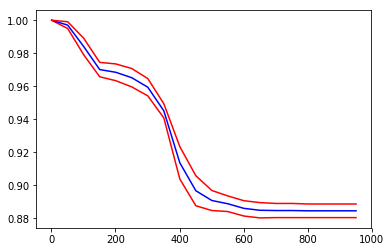

In [23]:
# Buscamos gráficamente el valor ópitmo para n_neighbors
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_inferior'],color='r')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['score_medio'],color='b')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_superior'],color='r');

In [24]:
# Los 100 vecinos mas cercanos no es muy poco para el tamaño de este dataset, dan numeros muy buenos para esos valores, por eso usé los 1000 vecinos mas cercanos que es mas representativo

In [25]:
df_scores_standar.loc[df_scores_standar.score_medio == df_scores_standar.score_medio.max()]

,n_neighbours,score_medio,score_std,limite_superior,limite_inferior
0,1,1.0,0.0,1.0,1.0


In [26]:
#no tiene errores si se considera el k=1 es decir el único vecino mas cercano. 
best_k = df_scores_standar.loc[df_scores_standar.score_medio == df_scores_standar.score_medio.max(),'n_neighbours'].values
best_k = best_k[0]
best_k

1

In [27]:
# Elegimos el modelo óptimo que nos había indicado cross validation
model = KNeighborsClassifier(n_neighbors=51) #aca iria el best k que es k=1, pero use 51 porque no parecia bien que de perfecto.
# Lo ajustamos sobre datos de entrenamiento
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=51, p=2,
           weights='uniform')

In [28]:
# Lo utilizamos para predecir en test
#X_test = scaler.transform(X_test) si uso el scaler deberia tambien normalizar el X_train, al ser dummies no necesita.
y_pred = model.predict(X_test)

In [29]:
# Elaboramos la matriz de confusión:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1052,    0],
       [   4,  975]], dtype=int64)

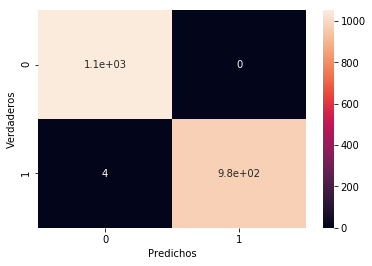

In [30]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

## Modelo: Regresion Logistica

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import linear_model

In [32]:
# Utilizamos sklearn para estandarizar la matriz de Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [33]:
lg = linear_model.LogisticRegression()

lg.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

y_pred_train = lg.predict(X_train_scaled)

y_pred_test = lg.predict(X_test_scaled)

In [34]:
lg.coef_

array([[ 0.07788189,  0.09817672, -0.00316815,  0.03354043, -0.16248025,
        -0.03675516, -0.32085911,  0.07490107,  0.29496297,  0.01262557,
         0.2196952 , -0.22928183, -0.09995507,  0.01610631, -0.25779798,
         0.15135525, -0.0667419 , -0.08153092,  0.32838309,  0.02567096,
        -0.05400155,  0.05400155, -0.81315553,  1.28985185,  1.21750854,
        -0.83282386,  0.08484396, -1.67114303,  1.22369273,  0.4449587 ,
         0.44245082, -0.12932792,  0.12932792,  0.53009959, -0.53009959,
        -0.80005554,  0.80005554,  0.66398508, -0.19771342, -0.07626855,
         0.13846558, -0.13581981, -0.26862471, -0.08508941, -0.14809224,
         0.10121272, -0.15836297, -0.12415158, -0.06283335,  0.03302886,
        -0.03302886,  0.32143779,  0.31185095, -0.47554293, -0.28097207,
        -0.56441799, -0.17112012,  0.56443336, -0.42915182, -0.12008596,
        -0.20537903,  0.25287102, -0.32243292,  0.54003226,  0.17593859,
         0.08484396, -0.17017374, -0.23770925,  0.1

In [35]:
lg.intercept_

array([-0.13091524])

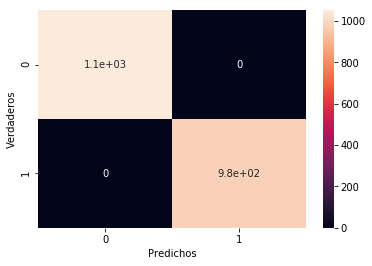

In [36]:
# Elaboramos la matriz de confusión:

confusion_matrix(y_test, y_pred_test)

sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)


plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [37]:
# Calculamos el accuracy

accuracy_score(y_test, y_pred_test)

1.0

In [38]:
# No es raro que de el accuracy perfecto??

## Modelo: Bernoulli Naive Bayes

In [39]:
from sklearn.naive_bayes import BernoulliNB
model3 = BernoulliNB()
model3.fit(X_train, y_train)
y3_pred = model.predict(X_test)

Text(0.5,15,'Predichos')

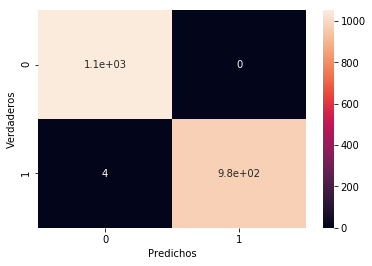

In [40]:
confusion_matrix(y_test, y3_pred)
sns.heatmap(confusion_matrix(y_test, y3_pred), annot=True)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')

In [41]:
#da el mismo resultado que KNN 